# TITANIC: Machine learning from Disaster 
The Survival rate is being predicted.


## STEP 1: Importing and Reading data
In this step:
1. All the libraries are imported
2. All the necessary files are being included

In [ ]:
# sppressing warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing numpy, pandas and matplotlib libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# reading all the data sets through read_csv

train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
g_sub = pd.read_csv('/content/gender_submission.csv')

## STEP 2: Understanding the data

In [ ]:
# to display the columns of the test.csv dataset

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###Null - Value Treatment:

In [ ]:
# to display the non_null count and data type of the dataset

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# to display the count of the null values

train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In this case the null value is in the Age, Cabin and Embarked column. So we have to fill the null value in order to get a good model.

In [ ]:
# to calculate the mean age to fill the missing values in the dataset

mean_age = train_data['Age'].mean()
print(mean_age)

29.69911764705882


In [ ]:
# filling the null values in 'age' column with the help of the mean value of the age

train_data['Age'] = train_data['Age'].fillna(mean_age)

In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# to find the unique values in the olumn Cabin

train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
# filling the missing values with the character 'A'

train_data['Cabin'] = train_data['Cabin'].fillna('A')

In [ ]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [ ]:
# here, the mode is being used to fill the missing values in the column Embarked

train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)

In [ ]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now, there is now missing values/null values in the train.csv dataset. So, we have to repeat the same steps in oredr to treat the null values in test.csv also

In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

As we can see, in the test.csv dataset the columns Age, Cabin and Fare has null values.

In [ ]:
# to calculate the mean age

mean_age_test = test_data['Age'].mean()
print(mean_age_test)

30.272590361445783


In [ ]:
# filling the null values with the mean value

test_data['Age'] = test_data['Age'].fillna(mean_age_test)

In [ ]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# filling null values with 'A'

test_data['Cabin'] = test_data['Cabin'].fillna('A')

In [ ]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [ ]:
# filling with the help of the mean fare

mean_fare = test_data['Fare'].mean()

# printing the mean_fare

print(mean_fare)
test_data['Fare'] = test_data['Fare'].fillna(mean_fare) 

35.6271884892086


In [ ]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Thus, we can say that both the datasets doesnt have any null values.

In [ ]:
# to get the count, mean, std, min, max describe()is being used

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# for the dimension of the dataset

test_data.shape

(418, 11)

In [ ]:
train_data.shape

(891, 12)

##STEP 3: Data Preparation

For categorical variables with multiple levels, dummy variables are created

In [ ]:
# selecting the categorical varaible

d_em = pd.get_dummies(train_data['Embarked'])
d_em.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
d_sex = pd.get_dummies(train_data['Sex'])
d_sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
# adding the dataframe to the main dataframe

train_data = pd.concat([train_data, d_em], axis = 1)
train_data = pd.concat([train_data, d_sex], axis = 1)

In [ ]:
 # checking the variables
 
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,A,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,A,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,A,S,0,0,1,0,1


In [ ]:
# selecting the categorical varaibles whose dummy variable is to be created

d_em_1 = pd.get_dummies(test_data['Embarked'])
d_sex_1 = pd.get_dummies(test_data['Sex'])

# adding the results to the main dataframe

test_data = pd.concat([test_data, d_em_1], axis = 1)
test_data = pd.concat([test_data, d_sex_1], axis = 1)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,A,Q,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,A,S,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,A,Q,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,A,S,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,A,S,0,0,1,1,0


In [ ]:
# dropping the repeated columns

train_data = train_data.drop(['Embarked', 'Sex', 'Name', 'Ticket', 'Cabin'], 1)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1


In [ ]:
# dropping the duplicate columns 

test_data = test_data.drop(['Embarked', 'Sex', 'Name', 'Ticket', 'Cabin'], 1)

In [ ]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,892,3,34.5,0,0,7.8292,0,1,0,0,1
1,893,3,47.0,1,0,7.0000,0,0,1,1,0
2,894,2,62.0,0,0,9.6875,0,1,0,0,1
3,895,3,27.0,0,0,8.6625,0,0,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1,1,0


##STEP 4: Training and Testing

In [ ]:
# importing  train_test_split

from sklearn.model_selection import train_test_split

# putting feature variable to x_train

x_train = train_data.drop(['PassengerId','Survived'], axis = 1)
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,35.0,1,0,53.1000,0,0,1,1,0
4,3,35.0,0,0,8.0500,0,0,1,0,1


In [ ]:
# putting response variable to y_train

y_train = train_data['Survived']
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## STEP 5: Correlations

In [ ]:
# importing seaborn library

import seaborn as sns
%matplotlib inline

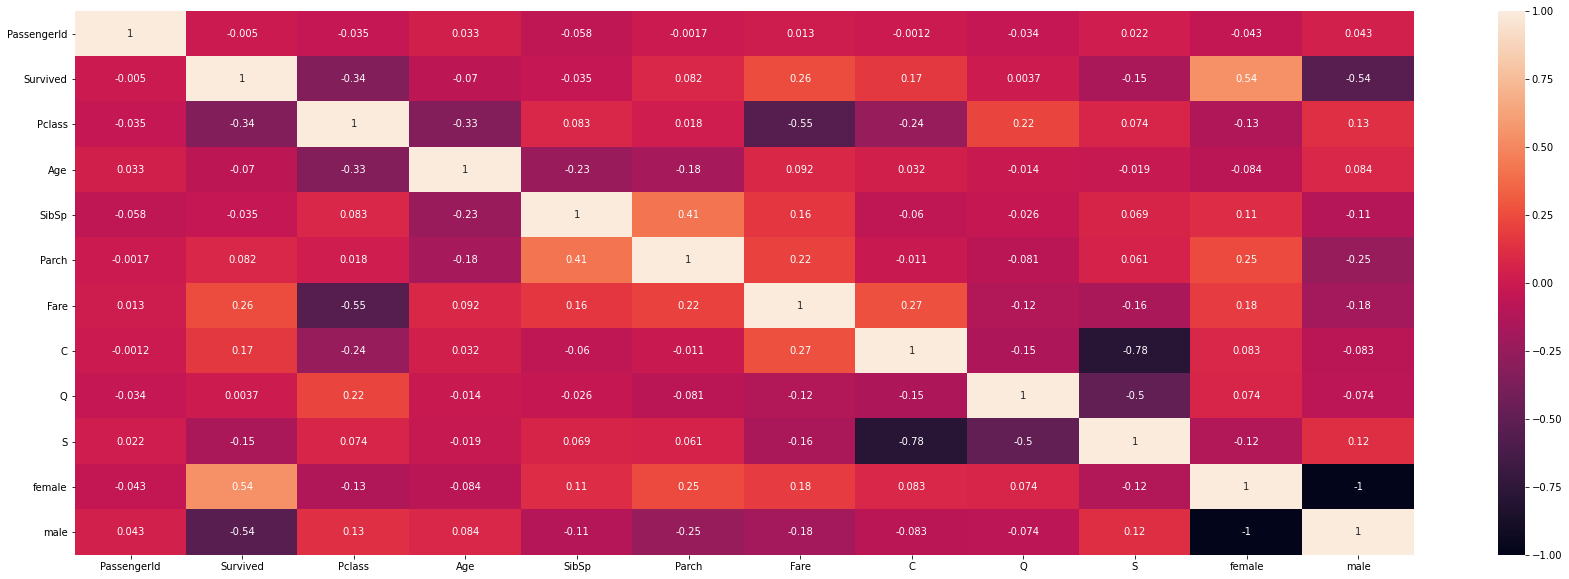

In [ ]:
# figure size of the correlation matrix

plt.figure(figsize = (30,10))

# function to plot the heatmap

sns.heatmap(train_data.corr(), annot = True)
plt.show()

## STEP 6: Building the Model

In [ ]:
# importing the statsmodel.api library

import statsmodels.api as sm

In [ ]:
# GLM for logistic regression model

lr1 = sm.GLM(y_train, (sm.add_constant(x_train)), family = sm.families.Binomial())
lr1.fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      882
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.39
Date:                Tue, 25 Aug 2020   Deviance:                       784.78
Time:                        10:52:06   Pearson chi2:                     904.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0586      0.287      7.180      0.000       1.497       2.621
Pclass        -1.1022      0.144     -7.675      0.000      -1.384      -0.821
Age           -0.0397      0.008     -5.061      0.000      -0.055      -0.024
SibSp         -0.3269      0.110     -2.985      0.003      -0.542      -0.112
Parch         -0.0946      0.119     -0.797      0.426      -0.327       0.138
Fare           0.0020      0.002      0.823      0.410      -0.003       0.007
C              0.8350      0.193      4.322      0.000       0.456       1.214
Q              0.8024      0.268      2.992      0.003       0.277       1.328
S              0.4212      0.148      2.853      0.004       0.132       0.711
female         2.3929      0.192     12.481      0.000       2.017       2.769
male          -0.3343      0.156     -2.137      0.033      -0.641      -0.028
==============================================================================
"""

From the above linear model regression results we can see that the p>|Z| values for few colmns are higher than 0.5. So, to treat them we are going to use RFE.

## STEP 8: Feature Selection using RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()

In [ ]:
# importing RFE from sklearn.feature_selection

from sklearn.feature_selection import RFE

# running RFE with 5 variables

rfe = RFE(logistic_reg, 5)
rfe = rfe.fit(x_train,y_train)

In [ ]:
rfe.support_

array([ True, False,  True, False, False, False, False,  True,  True,
        True])

In [ ]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Pclass', True, 1),
 ('Age', False, 5),
 ('SibSp', True, 1),
 ('Parch', False, 3),
 ('Fare', False, 6),
 ('C', False, 2),
 ('Q', False, 4),
 ('S', True, 1),
 ('female', True, 1),
 ('male', True, 1)]

In [ ]:
c = x_train.columns[rfe.support_]

In [ ]:
x_train.columns[~rfe.support_]

Index(['Age', 'Parch', 'Fare', 'C', 'Q'], dtype='object')

In [ ]:
# again accesing the model with the RFE variables

x_train_lr = sm.add_constant(x_train[c])
lr2 = sm.GLM(y_train, x_train_lr, family = sm.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -407.04
Date:                Tue, 25 Aug 2020   Deviance:                       814.08
Time:                        10:52:06   Pearson chi2:                     915.
No. Iterations:                    71                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5662      0.194      8.070      0.000       1.186       1.947
Pclass        -0.9325      0.107     -8.727      0.000      -1.142      -0.723
SibSp         -0.2258      0.095     -2.387      0.017      -0.411      -0.040
S             -0.4439      0.194     -2.294      0.022      -0.823      -0.065
female         2.1365      0.154     13.848      0.000       1.834       2.439
male          -0.5702      0.115     -4.971      0.000      -0.795      -0.345
==============================================================================
"""

In this result the p>|z| values are less than 0.5 for all the columns.

In [ ]:
# to find the predicted values of the dataset

y_pred=res.predict(x_train_lr)
y_pred[:10]

0    0.077890
1    0.927193
2    0.613284
3    0.890942
4    0.095735
5    0.141658
6    0.406017
7    0.051027
8    0.613284
9    0.833661
dtype: float64

Creating a dataframe using the actual and the predicted values on the training dataset 

In [ ]:
# to create the dataframe y_final_pred

y_final_pred = pd.DataFrame({'A_S': y_train.values, 'Prob': y_pred})
y_final_pred['PassengerId'] = y_train.index
y_final_pred.head()

,A_S,Prob,PassengerId
0,0,0.077890,0
1,1,0.927193,1
2,1,0.613284,2
3,1,0.890942,3
4,0,0.095735,4


Creating a new column with 1 if the Prob>0.5 and else 0

In [ ]:
# to map the Survived column with 0 and 1 

y_final_pred['Survived'] = y_final_pred.Prob.map(lambda x: 1 if x>0.5 else 0)
y_final_pred.head()

,A_S,Prob,PassengerId,Survived
0,0,0.077890,0,0
1,1,0.927193,1,1
2,1,0.613284,2,1
3,1,0.890942,3,1
4,0,0.095735,4,0


In [ ]:
from sklearn import metrics

In [ ]:
# printing the confusion matrix for train data

cm = metrics.confusion_matrix(y_final_pred.A_S, y_final_pred.Survived)
print(cm)

[[462  87]
 [101 241]]


The above confusion matrix reflects:

Predicted      Died           Survived  

Actual              

Died                 462            87

Survived            101           241

In [ ]:
# The overall accuracy for the training set is being calculated

print(metrics.accuracy_score(y_final_pred.A_S, y_final_pred.Survived))

0.7890011223344556


The accuracy for the train dataset comes out to be 0.789 or 78%.

## STEP 9: Making predictions for the test dataset

In [ ]:
# checking the dimensions of the x_test_1

x_test_1.shape

(418, 6)

In [ ]:
# making predictions

y_pred_test = res.predict(x_test_1)

In [ ]:
# printing y_pred_test as an array

y_pred_test

0      0.141658
1      0.558558
2      0.295452
3      0.095735
4      0.558558
         ...   
413    0.095735
414    0.941042
415    0.095735
416    0.095735
417    0.116354
Length: 418, dtype: float64

In [ ]:
# converting the array into a dataframe y_test_df

y_test_df = pd.DataFrame(y_pred_test)

In [ ]:
# concatenating the dataframe y_test_df with g_sub

y_final_pred_1 = pd.concat([y_test_df, g_sub], axis=1) 

# In this case, g_sub is the dataframe which contains  gender_submission.csv

In [ ]:
# displaying the data frame

y_final_pred_1

,0,PassengerId,Survived
0,0.141658,892,0
1,0.558558,893,1
2,0.295452,894,0
3,0.095735,895,0
4,0.558558,896,1
...,...,...,...
413,0.095735,1305,0
414,0.941042,1306,1
415,0.095735,1307,0
416,0.095735,1308,0


In [ ]:
# rename the column '0' as Survived_Prob

y_final_pred_1 = y_final_pred_1.rename(columns={0: 'Survived_Prob'})

In [ ]:
y_final_pred_1.head()

,Survived_Prob,PassengerId,Survived
0,0.141658,892,0
1,0.558558,893,1
2,0.295452,894,0
3,0.095735,895,0
4,0.558558,896,1


Creating a new column 'Final_survived' with 1 if Survived_prob>0.5 else 0

In [ ]:
# mapping the survived_prob values with 1 and 0
y_final_pred_1['Final_Survived'] = y_final_pred_1.Survived_Prob.map(lambda x:1 if x>0.5 else 0)

In [ ]:
y_final_pred_1.head()

,Survived_Prob,PassengerId,Survived,Final_Survived
0,0.141658,892,0,0
1,0.558558,893,1,1
2,0.295452,894,0,0
3,0.095735,895,0,0
4,0.558558,896,1,1


In [ ]:
# calculating the accuracy for the test dataset

metrics.accuracy_score(y_final_pred_1.Survived, y_final_pred_1.Final_Survived)

0.9593301435406698

The accuracy score for the test dataset is found out to be 0.95 or 95%

In [ ]:
# making the confusion matrix

cm2 = metrics.confusion_matrix(y_final_pred_1.Survived, y_final_pred_1.Final_Survived)
cm2

array([[252,  14],
       [  3, 149]])

The confusion matrix is described as follows:

In [ ]:
TP = cm2[1,1] # true positive
TN = cm2[0,0] # true negatives
FP = cm2[0,1] # false positives
FN = cm2[1,0] # false negatives

In [ ]:
# to calculate the sensitivity of the model

TP / float(TP+FN)

0.9802631578947368

In [ ]:
# to calculate the specificity of the model

TN / float(TN+FP)

0.9473684210526315

In [ ]:
f_df = pd.DataFrame(y_final_pred_1, columns=['PassengerId','Survived'])

In [ ]:
f_df.to_csv('Final_Survived.csv', index=False)